In [58]:
%matplotlib inline
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import pandas as pd
import numpy as np

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter,crossings_nonzero_pos2neg

from scipy import signal

import pywt

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [81]:
ts = GaitTimeSeries.load_data('/home/c/data/pdkit/cloudupdrs/GAIT_-_2018-06-11_20-33-08_-_d90b653403_-_13309.csv')
tss = GaitTimeSeries.load_data('/home/c/data/pdkit/acc/down-pocket-in.tsv', format_file='accapp', )

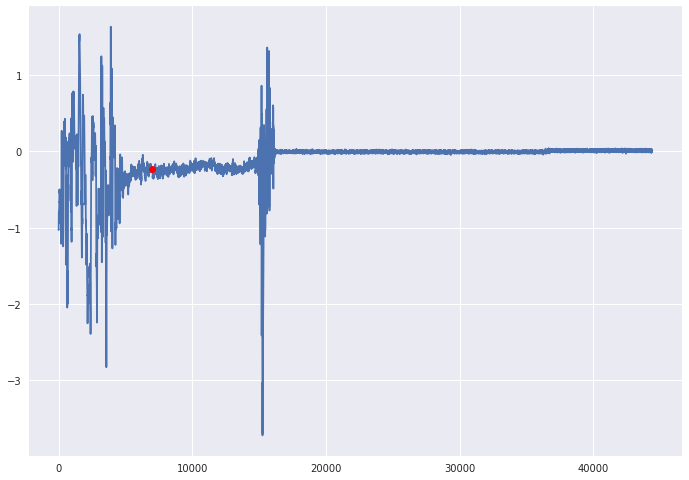

In [82]:
stop_point = 7000

plt.plot(ts.x.values)
plt.plot(stop_point, ts.x[stop_point], 'ro')

In [83]:
ts = ts[:stop_point]

In [84]:
ts.head()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000000000,0.000000,-1.027144,-0.584203,8.585870,8.666803
1970-01-01 00:00:00.002001300,0.002001,-1.027144,-0.627300,8.530801,8.615283
1970-01-01 00:00:00.004002633,0.004003,-1.029538,-0.648849,8.504464,8.591092
1970-01-01 00:00:00.006005666,0.006006,-1.019961,-0.696734,8.456578,8.546313
1970-01-01 00:00:00.008000666,0.008001,-1.012778,-0.723071,8.427847,8.519223


In [85]:
tss.head()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000,0.000,-1.645,3.208,8.207,8.963935
1970-01-01 00:00:00.003,0.003,-1.812,3.301,8.233,9.053300
1970-01-01 00:00:00.008,0.008,-1.963,3.359,8.279,9.147573
1970-01-01 00:00:00.014,0.014,-2.076,3.349,8.315,9.201348
1970-01-01 00:00:00.018,0.018,-2.102,3.337,8.260,9.153227


In [86]:
gp = GaitProcessor(sampling_frequency=100.0)
ts = gp.resample_signal(ts)
ts.head()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000,0.004002,-1.023313,-0.656031,8.501112,8.666803
1970-01-01 00:00:00.010,0.014009,-0.932331,-0.870079,8.376131,8.482890
1970-01-01 00:00:00.020,0.024018,-0.851404,-1.028580,8.348836,8.445711
1970-01-01 00:00:00.030,0.034017,-0.812138,-1.175589,8.393370,8.484930
1970-01-01 00:00:00.040,0.044022,-0.800167,-1.256515,8.515957,8.596079


In [87]:
gp.sampling_frequency=40.0
tss = gp.resample_signal(tss)

In [88]:
tss.head()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000,0.01100,-1.942,3.304500,8.2645,8.963935
1970-01-01 00:00:00.025,0.04175,-1.824,3.174000,8.0640,9.139522
1970-01-01 00:00:00.050,0.06200,-1.061,2.936833,7.8905,8.483107
1970-01-01 00:00:00.075,0.08900,-0.220,2.484200,8.8792,8.741018
1970-01-01 00:00:00.100,0.11420,-0.205,2.243000,9.2622,9.478397


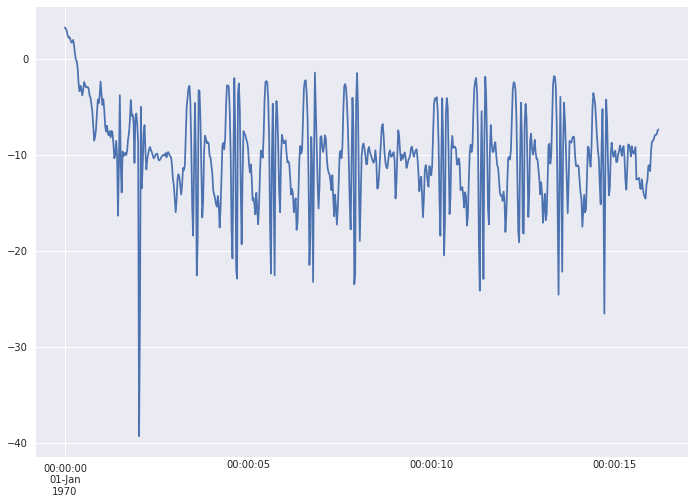

In [89]:
tss.y.plot()

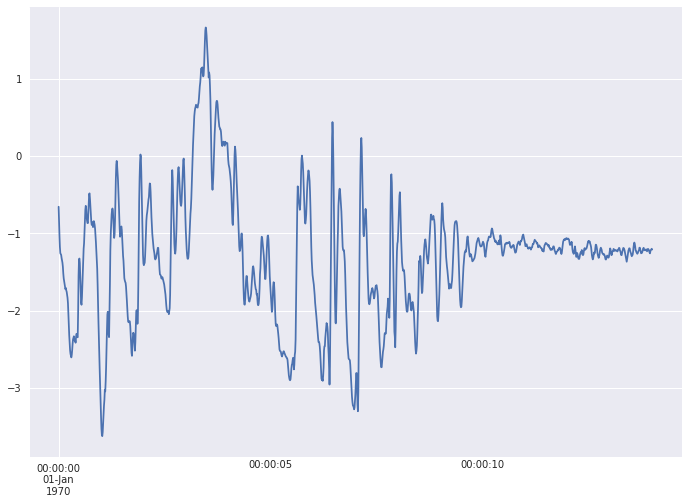

In [90]:
ts.y.plot()

In [75]:
tz = GaitTimeSeries.load_data('/home/c/data/pdkit/acc/lcd-up.tsv', format_file='accapp', )

In [76]:
tzz = gp.resample_signal(tz)

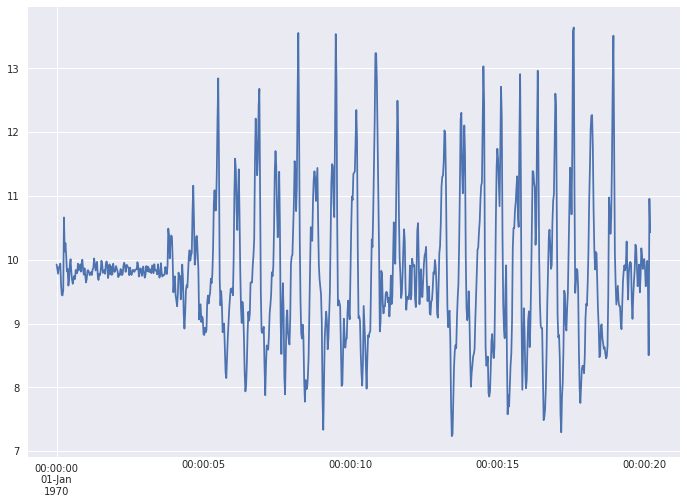

In [80]:
tzz.z.plot()

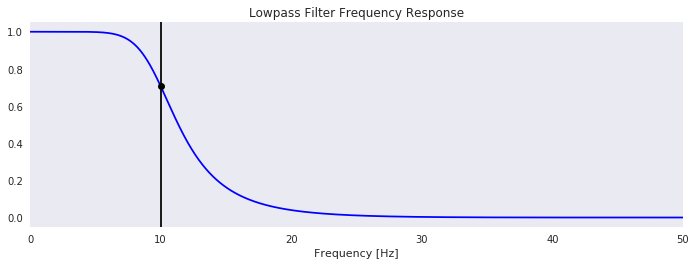

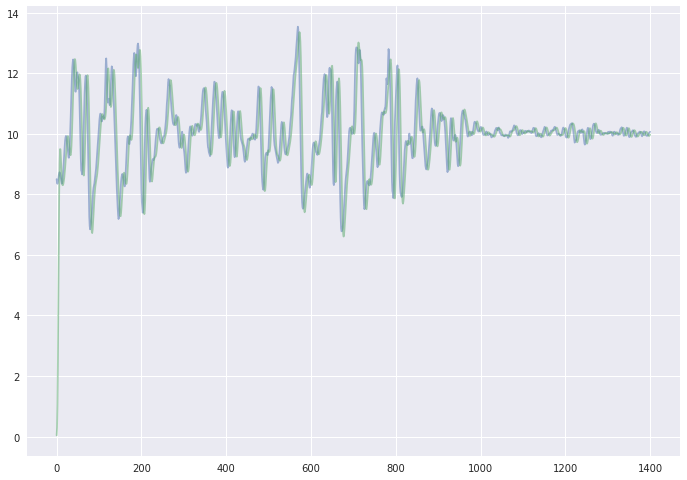

In [38]:
X = ts.z.values

x = butter_lowpass_filter(X, sample_rate=100.0, cutoff=10, order=4, plot=True)
plt.plot(X,  alpha=0.5)
plt.plot(x, alpha=0.5)

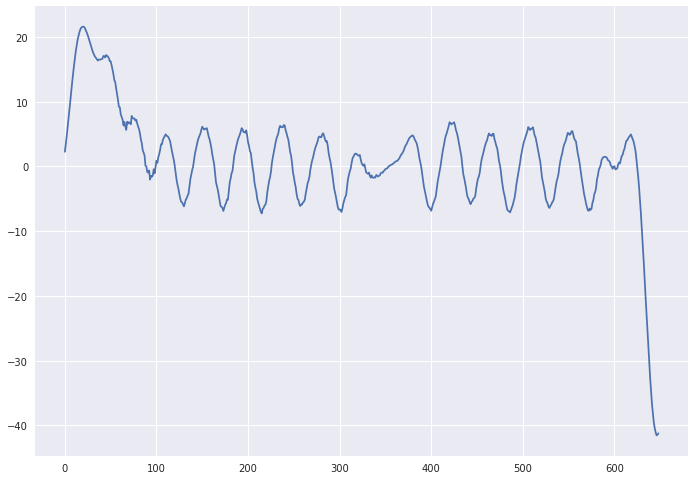

In [112]:
cwtmatr, freqs = pywt.cwt(tss.y.values, range(1, 50), 'gaus1')
#plt.plot(cwtmatr[5])
plt.plot(cwtmatr[15])

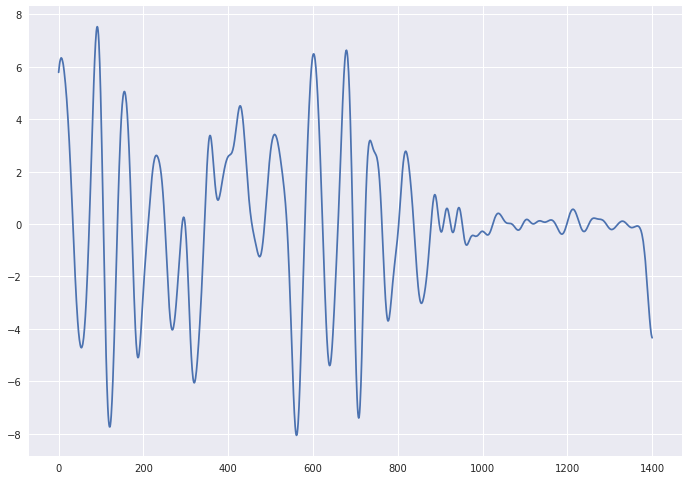

In [111]:
cwtmatr, freqs = pywt.cwt(ts.y.values, range(1, 50), 'gaus1')
#plt.plot(cwtmatr[0])
plt.plot(cwtmatr[15])# / np.std(cwtmatr[15]) * 0.5)

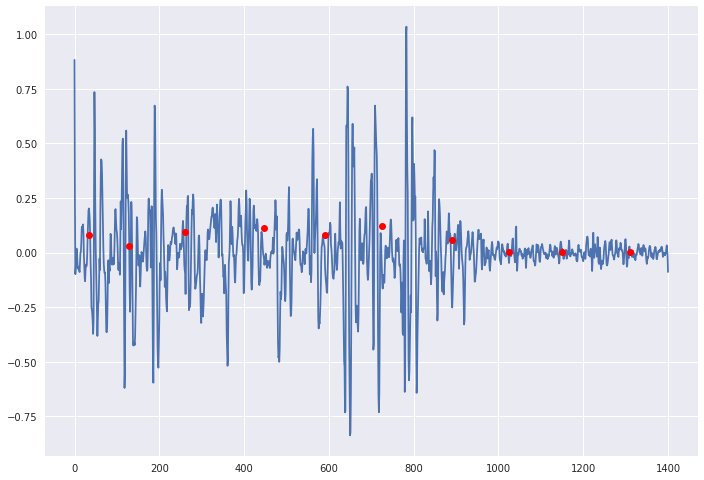

In [48]:
smooth = cwtmatr[40]
zc = crossings_nonzero_pos2neg(smooth)
plt.plot(cwtmatr[0])
plt.plot(zc, smooth[zc], 'ro')

In [86]:
gt = signal.argrelextrema(smooth, np.greater)[0]
lt = signal.argrelextrema(smooth, np.less)[0]

peaks = sorted(list(gt) + list(lt))

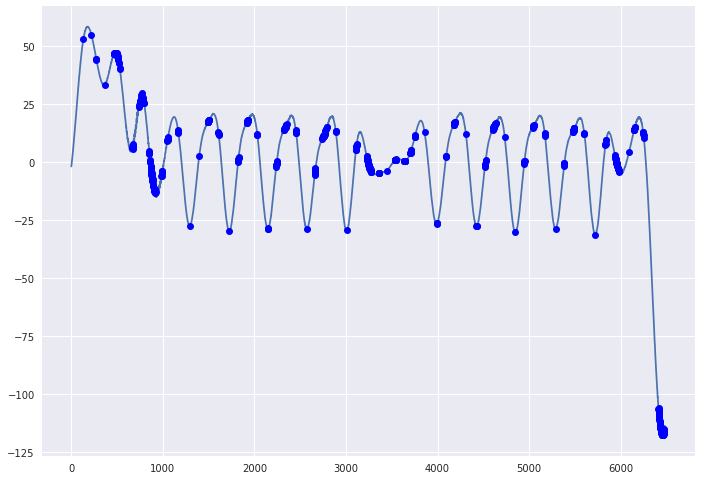

In [95]:
plt.plot(smooth)
plt.plot(peaks, smooth[peaks], 'bo')

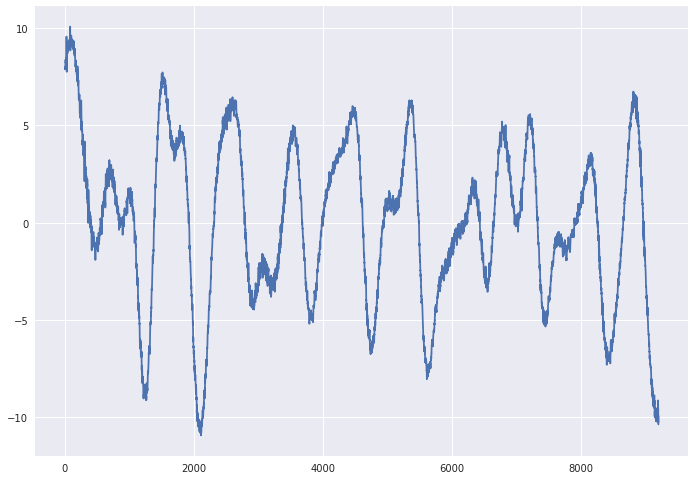

In [95]:
top_peak = np.max(axis[peaks])
bot_peak = np.min(axis[peaks])

plt.plot(axis)
plt.plot(np.argmax(axis[peaks]), axis[np.argmax(axis[peaks])], 'go')
plt.plot(np.argmin(axis[peaks]), axis[np.argmin(axis[peaks])], 'ro')

In [106]:
range(1, rts.shape[0])

range(1, 8672)

In [111]:
coef, freqs=pywt.cwt(rts.y.values , range(1, 10), 'gaus1')

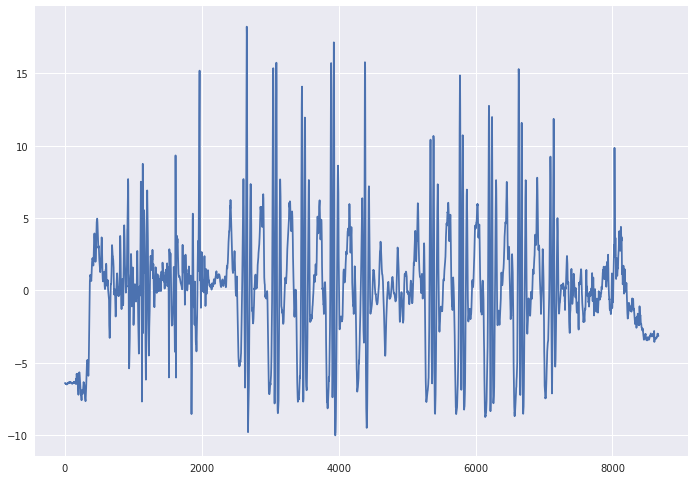

In [121]:
plt.plot(signal.detrend(rts.y))

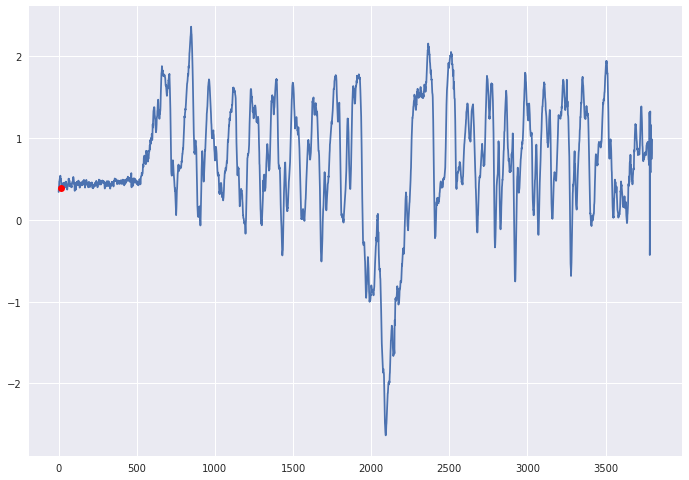

In [11]:
start,stop = gp.remove_static_signal(ts[200:], axis='x',signal_threshold=.4)
start,stop

plt.plot(ts['y'][200:].values)
plt.plot(start, ts.y[200:][start], 'ro')

In [12]:
t, i, l = gp.freeze_of_gait(ts)

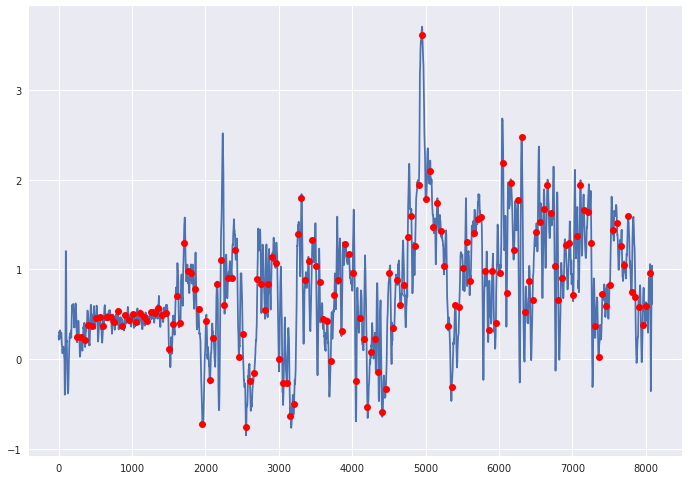

In [13]:
plt.plot(rts.x.values)
plt.plot(t, rts.x[t], 'ro')

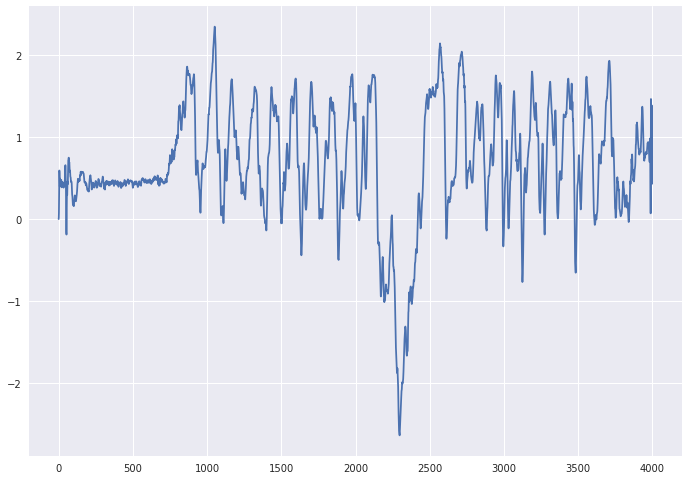

In [14]:
sig = butter_lowpass_filter(ts.y.values, sample_rate=40, cutoff=10.0, order=10)
plt.plot(sig)

In [15]:
smth = pd.rolling_mean(ts.y, window=30)

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


In [16]:
def find_highest_peak(axis):
    gt = signal.argrelextrema(axis, np.greater)[0]
    lt = signal.argrelextrema(axis, np.less)[0]
    
    peaks = sorted(list(gt) + list(lt))

    top_peak = np.max(axis[peaks])
    bot_peak = np.min(axis[peaks])
    
    plt.plot(axis)
    plt.plot(np.argmax(axis[peaks]), axis[np.argmax(axis[peaks])], 'go')
    plt.plot(np.argmin(axis[peaks]), axis[np.argmin(axis[peaks])], 'ro')
    

def start_end_turn(f_sig):
    
    gt = signal.argrelextrema(f_sig, np.greater)[0]
    lt = signal.argrelextrema(f_sig, np.less)[0]
    
    peaks = sorted(list(gt) + list(lt))

    top_peak = np.argmax(f_sig[peaks])
    bot_peak = np.argmin(f_sig[peaks])
    
    if top_peak > bot_peak:
        start_turn = peaks[bot_peak - 1]
        end_turn = peaks[top_peak + 1]
    else:
        start_turn = peaks[top_peak - 1]
        end_turn = peaks[bot_peak + 1]


    plt.plot(f_sig)
    plt.plot(start_turn, f_sig[start_turn], 'go')
    plt.plot(end_turn, f_sig[end_turn], 'ro')
    
    return start_turn, end_turn

def walk_turn_times(signal, verbose=False):
    #signal = butter_lowpass_filter(data, freq, cutoff=2, order=3)
    
    start, end = start_end_turn(signal)
    
    forward = signal[:start]
    backward = signal[end:]
    turn = signal[start:end]
    
    time_f = len(forward) / freq
    time_b = len(backward) / freq
    time_t = len(turn) / freq
    
    if verbose:
        print("Time it took to walf forward: {} s".format(time_f))
        print("Time it took to turn: {} s".format(time_t))
        print("Time it took to walk backwards: {} s ".format(time_b))
    
    return time_f, time_t, time_b

def two_axis_turn_time(data, freq):
    f_y, t_y, b_y = walk_turn_times(data.y, freq)
    f_z, t_z, b_z = walk_turn_times(data.z, freq)
    
    f = np.mean([f_y, f_z])
    t = np.mean([t_y, t_z])
    b = np.mean([b_y, b_z])
    
    print("Time it took to walf forward: {} s".format(f))
    print("Time it took to turn: {} s".format(t))
    print("Time it took to walk backwards: {} s ".format(b))

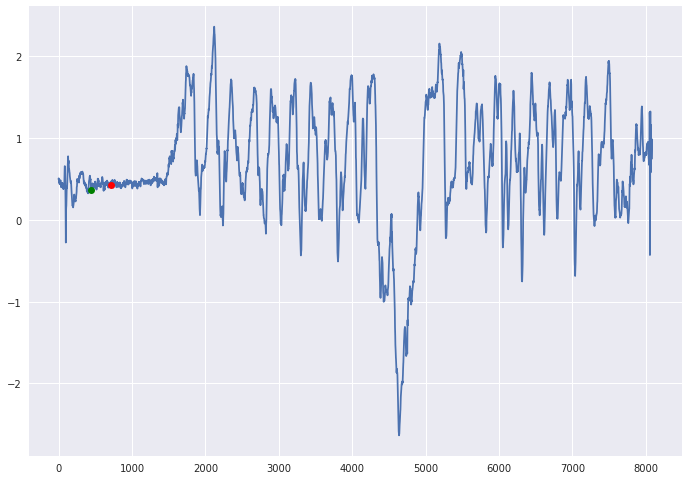

In [17]:
find_highest_peak(rts.y.values)#, verbose=1)

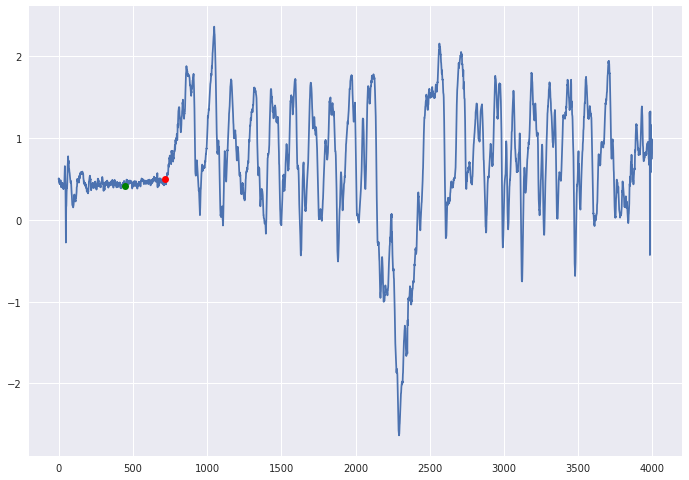

In [18]:
axis = ts.y.values

gt = signal.argrelextrema(axis, np.greater)[0]
lt = signal.argrelextrema(axis, np.less)[0]
    
peaks = sorted(list(gt) + list(lt))

top_peak = np.max(axis[peaks])
bot_peak = np.min(axis[peaks])

plt.plot(axis)
plt.plot(np.argmax(axis[peaks]), axis[np.argmax(axis[peaks])], 'go')
plt.plot(np.argmin(axis[peaks]), axis[np.argmin(axis[peaks])], 'ro')

In [19]:
turn_peak = np.argmax(np.abs(ts.y.values))

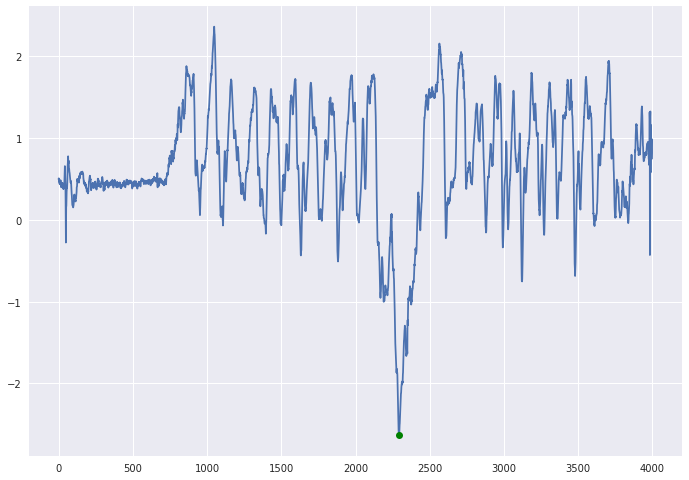

In [20]:
plt.plot(axis)
plt.plot(turn_peak, axis[turn_peak], 'go')

In [21]:
zero_crossings = np.where(np.diff(np.sign(axis)))[0]
zero_crossings

array([  47,   49, 1104, 1108, 1385, 1399, 1494, 1497, 1498, 1501, 1623,
       1638, 1771, 1773, 1875, 1890, 2019, 2021, 2022, 2023, 2144, 2239,
       2243, 2416, 2431, 2439, 2605, 2614, 2874, 2882, 2988, 2997, 3025,
       3031, 3114, 3128, 3266, 3274, 3472, 3486, 3605, 3613, 3617, 3618,
       3834, 3839, 3982, 3984])

In [22]:
zc = crossings_nonzero_pos2neg(axis)

In [23]:
zc

array([  47, 1104, 1385, 1494, 1623, 1771, 1875, 2019, 2022, 2144, 2243,
       2431, 2605, 2874, 2988, 3025, 3114, 3266, 3472, 3605, 3617, 3834,
       3982])

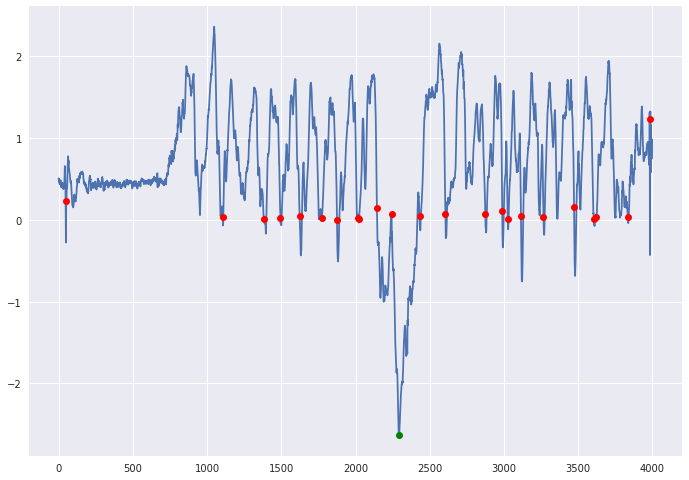

In [24]:
plt.plot(axis)
plt.plot(turn_peak, axis[turn_peak], 'go')
plt.plot(zc, axis[zc], 'ro')

In [31]:
def get_turning_time(data, thresh=0.1):
    
    turn_peak = np.argmax(np.abs(data.values))
    
    zc = crossings_nonzero_pos2neg(data.values)
    
    start = zc[zc < turn_peak][-2:]
    end = zc[zc > turn_peak][:2]

    end_diff = data.index[end[1]] - data.index[end[0]]
    start_diff = data.index[start[1]] - data.index[start[0]]
    
    # add logic to determine if turn started earlier
    # fix times as they are wrong!!
    
    time_took = data.index[end[0]] - data.index[start[-1]]
    
    plt.plot(data)
    plt.plot(turn_peak, data.values[turn_peak], 'go')
    plt.plot(start, data.values[start], 'bo')
    plt.plot(end, data.values[end], 'ro')
    
    return time_took, [start, end, turn_peak],[start_diff, end_diff]

0 days 00:00:09.525000


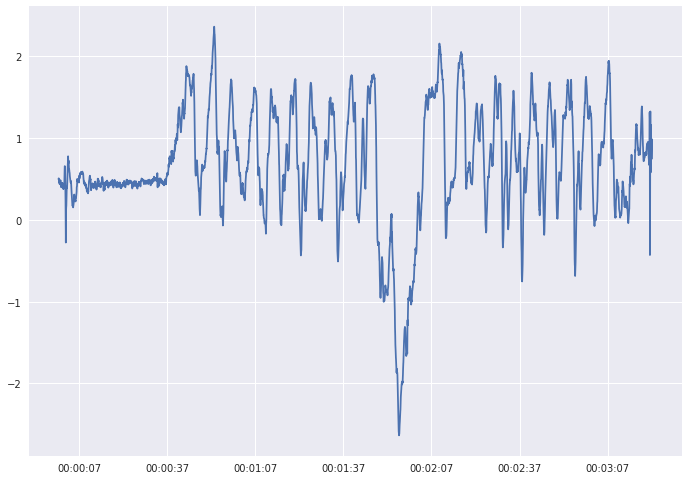

In [32]:
time_took, [start, end, turn_peak],[start_diff, end_diff] = get_turning_time(rts.y)
print(time_took)

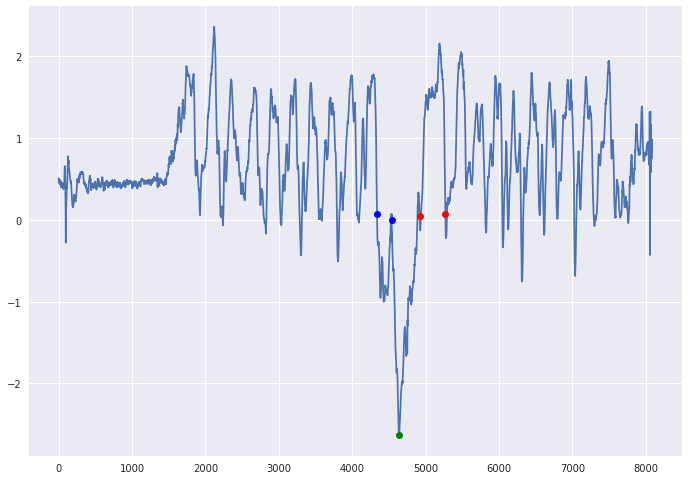

In [73]:
plt.plot(rts.y.values)
plt.plot(turn_peak, rts.y.values[turn_peak], 'go')
#plt.plot(zc, axis[zc], 'ro')
plt.plot(start, rts.y.values[start], 'bo')
plt.plot(end, rts.y.values[end], 'ro')

This is find up to this point but we still need the following:
    - calculate the time between zero crossings 
    - if this time is less than a thresh use previous peak as start or end turn_peak
    - calculate the time between start and end

In [43]:
def calculate_static_signal(signal, frequency=100, cutoff=2, order=3):

    #signal = butter_lowpass_filter(signal, frequency, cutoff=cutoff, order=order)
    
    for i, s in enumerate(signal):
        if not (-0.1 <= s <= 0.1):
            start = i
            break
    
    for i, s in reversed(list(enumerate(signal))):
        if not (-0.1 <= s <= 0.1):
            stop = i
            break
            
    plt.plot(signal.values)
    plt.plot(start, signal.values[start], 'ro')
    plt.plot(stop, signal.values[stop], 'ro')
            
    return start, stop

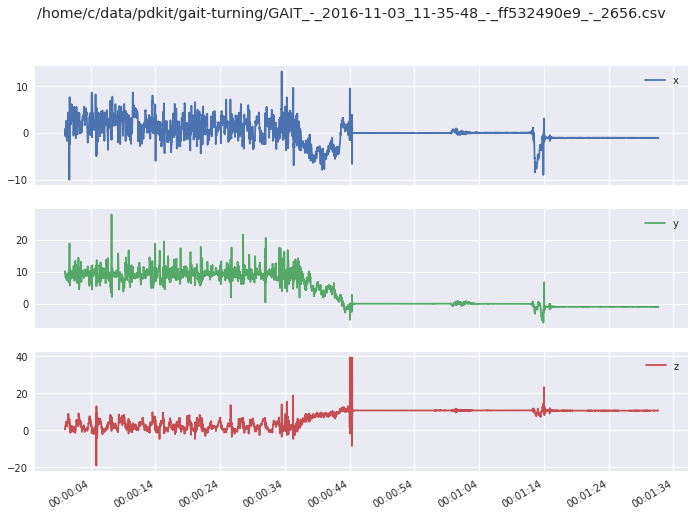

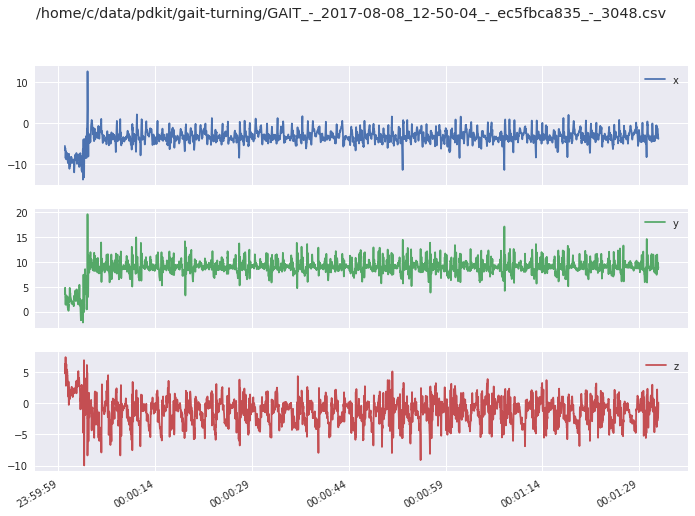

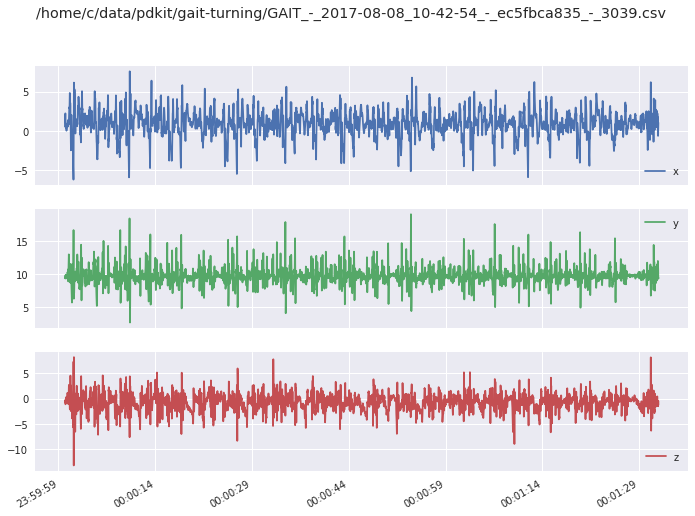

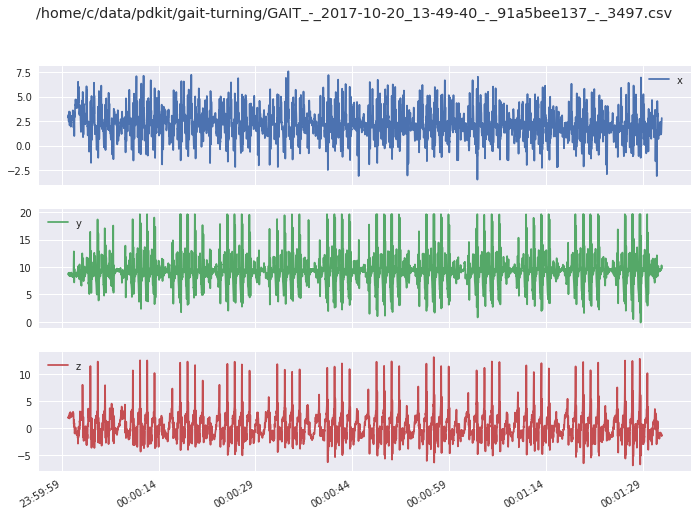

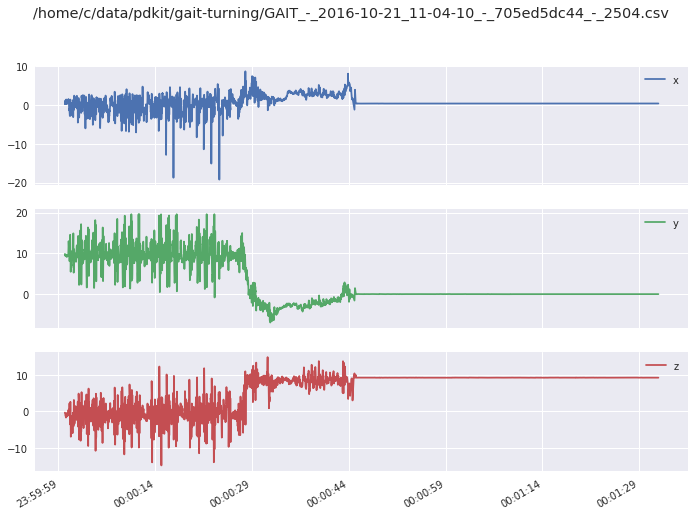

In [77]:
from glob import iglob

for f in iglob('/home/c/data/pdkit/gait-turning/*.csv'):
    name = f.split('/')[-1].split('.')[0]
    d = GaitTimeSeries.load_data(f)
    d[['x', 'y', 'z']].plot(subplots=True, title=f);
    plt.savefig('{}.png'.format(name))

In [34]:
p = GaitProcessor()

In [35]:
res = p.resample_signal(d)

In [71]:
d[[]].plot(subplots=True, layout=(1,3), ylim=[0,40])

ValueError: Layout of 1x3 must be larger than required size 5

<Figure size 842.4x595.44 with 0 Axes>